In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import random

from circuit.vcamp import VCAmpMOOProb
from circuit import ngspice as ng
from circuit import nsga2

ModuleNotFoundError: No module named 'circuit'

In [1]:
import os
import sys

print(sys.path)


['/home/nlourenco/vscode_aida/aida-rl/notebooks/copic/src', '/home/nlourenco/vscode_aida/aida-rl/notebooks/copic/test', '/home/nlourenco/vscode_aida/aida-rl/notebooks', '/usr/lib64/python36.zip', '/usr/lib64/python3.6', '/usr/lib64/python3.6/lib-dynload', '', '/home/nlourenco/vscode_aida/copic/copic_venv/lib64/python3.6/site-packages', '/home/nlourenco/vscode_aida/copic/copic_venv/lib/python3.6/site-packages', '/home/nlourenco/vscode_aida/copic/copic_venv/lib64/python3.6/site-packages/IPython/extensions', '/home/nlourenco/.ipython', '/home/nlourenco/.local/lib/python3.6/site-packages']


In [2]:
seed = 17  
np.random.seed(seed)
random.seed(seed)

sat_conditions = {}
sat_conditions["vov_mpm0"] = 0.05
sat_conditions["vov_mpm1"] = 0.05
sat_conditions["vov_mpm2"] = 0.05
sat_conditions["vov_mpm3"] = 0.05
sat_conditions["vov_mnm4"] = 0.05
sat_conditions["vov_mnm5"] = 0.05
sat_conditions["vov_mnm6"] = 0.05
sat_conditions["vov_mnm7"] = 0.05
sat_conditions["vov_mnm8"] = 0.05
sat_conditions["vov_mnm9"] = 0.05
sat_conditions["vov_mnm10"] = 0.05
sat_conditions["vov_mnm11"] = 0.05

sat_conditions["delta_mpm0"] = 0.1
sat_conditions["delta_mpm1"] = 0.1
sat_conditions["delta_mpm2"] = 0.1
sat_conditions["delta_mpm3"] = 0.1
sat_conditions["delta_mnm4"] = 0.1
sat_conditions["delta_mnm5"] = 0.1
sat_conditions["delta_mnm6"] = 0.1
sat_conditions["delta_mnm7"] = 0.1
sat_conditions["delta_mnm8"] = 0.1
sat_conditions["delta_mnm9"] = 0.1
sat_conditions["delta_mnm10"] = 0.1
sat_conditions["delta_mnm11"] = 0.1

gt={'gdc': 50,'gbw': 35e6,'pm' : 45.0, 'fom': 900}
gt.update(sat_conditions)

circuit = VCAmpMOOProb(
ng.Specifications(objective=[('idd', 1), ('gbw', -1), ('gdc', -1)  ], lt={'idd': 35e-5,'pm' : 90.0},gt=gt))


....................

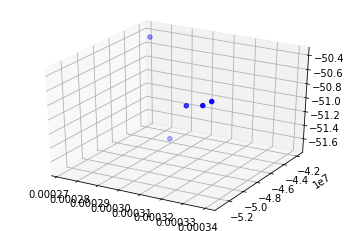

Best gsum       0.00
Running time      27.79, percentage 10.0
....................

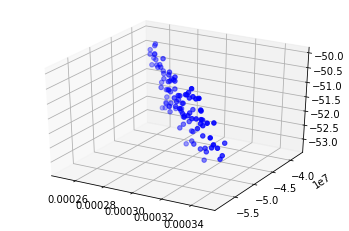

Best gsum       0.00
Running time      55.12, percentage 20.0
....................

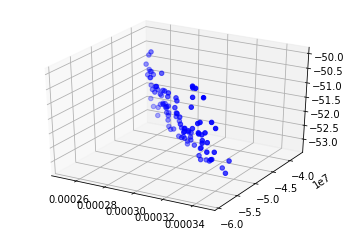

Best gsum       0.00
Running time      82.90, percentage 30.0
....................

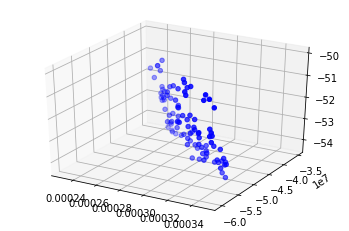

Best gsum       0.00
Running time     111.36, percentage 40.0
....................

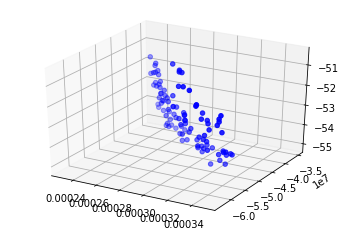

Best gsum       0.00
Running time     139.25, percentage 50.0
....................

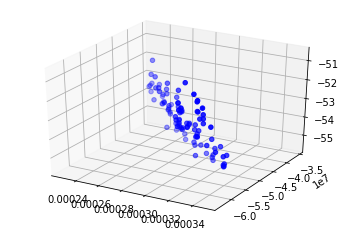

Best gsum       0.00
Running time     167.41, percentage 60.0
....................

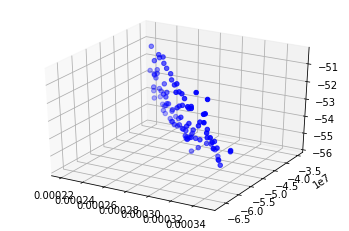

Best gsum       0.00
Running time     195.82, percentage 70.0
....................

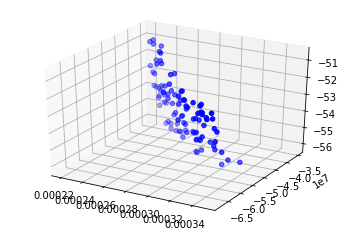

Best gsum       0.00
Running time     224.43, percentage 80.0
....................

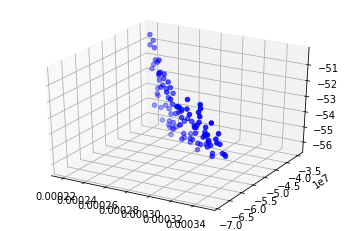

Best gsum       0.00
Running time     253.40, percentage 90.0
....................

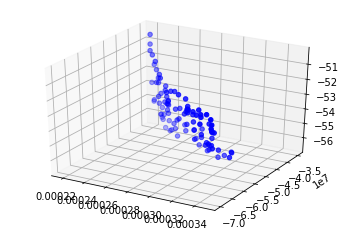

Best gsum       0.00
Running time     282.52, percentage 100.0
.

In [3]:
%matplotlib inline
a = nsga2.Nsga2(circuit, pop_size=100, eva=100*200)
pop_dec, pop_obj, pop_cstr = a.run()

<IPython.core.display.Javascript object>


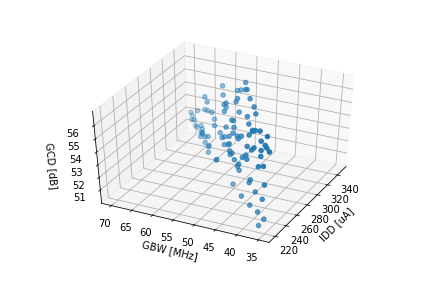

In [6]:
%matplotlib notebook
front_no, max_front = nsga2.fnd_sort(pop_obj, pop_cstr)
non_dominated = pop_obj[front_no == 1, :]
        
        
ax = plt.subplot(111, projection='3d')
ax.set_xlabel("IDD [uA]")
ax.set_ylabel("GBW [MHz]")
ax.set_zlabel("GCD [dB]")
ax.scatter(non_dominated[:,0]*1e6, -non_dominated[:,1]*1e-6,-non_dominated[:,2])

b = a

plt.show()

In [5]:
(np.random.random((2, 4)) < 0.3 ).astype(int)


array([[0, 0, 0, 0],
       [0, 0, 1, 0]])

In [12]:
np.savez("runs1.dump", a.parents_dec)
[iter, ...] = pop_dec[mating_pool, :]
            self.parents_obj[iter, ...] = pop_obj[mating_pool, :]
            self.parents_cstr[iter, ...] = pop_cstr[mating_pool, :]
             
            offspring_dec, offspring_obj, offspring_cstr  = self.prob.individual(self.prob.variation(pop_dec[mating_pool, :]))
            
            self.children_dec[iter, ...] = offspring_dec[mating_pool, :]
            self.children_obj[iter, ...] = offspring_obj[mating_pool, :]
            self.children_cstr[iter, ...] = offspring_cstr[mating_pool, :]


Help on function savez in module numpy.lib.npyio:

savez(file, *args, **kwds)
    Save several arrays into a single file in uncompressed ``.npz`` format.
    
    If arguments are passed in with no keywords, the corresponding variable
    names, in the ``.npz`` file, are 'arr_0', 'arr_1', etc. If keyword
    arguments are given, the corresponding variable names, in the ``.npz``
    file will match the keyword names.
    
    Parameters
    ----------
    file : str or file
        Either the file name (string) or an open file (file-like object)
        where the data will be saved. If file is a string or a Path, the
        ``.npz`` extension will be appended to the file name if it is not
        already there.
    args : Arguments, optional
        Arrays to save to the file. Since it is not possible for Python to
        know the names of the arrays outside `savez`, the arrays will be saved
        with names "arr_0", "arr_1", and so on. These arguments can be any
        expression.

In [5]:
a = [[]] * 10
a[0] = 10
a[1] = 15
print (a)

[10, 15, [], [], [], [], [], [], [], []]


In [21]:
meas_names = ("S11_down","S11","S11_up",
                "S12_down","S12","S12_up",
                "S21_down","S21","S21_up",
                "S22_down","S22","S22_up",
                "NF","NF_up","NF_down",
                "power","idd","PowerdBm","IIP3")
  
  
  
measures = [[None]*len( meas_names) for i in range(3)] 
print (measures)

[[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]]


In [22]:
measures[0][meas_names.index("S11")] = 10
print (meas_names.index("S11"))

1


In [23]:
measures[0][2] = 15


In [24]:
print (measures)


[[None, 10, 15, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]]


In [26]:
print (type(int("10")))

<class 'int'>
